# 1. Setup

In [1]:
apikey = 'PUTAPIKEY'
secret = 'APISECRETKEY'

In [2]:
!pip install python-binance pandas mplfinance

  Attempting uninstall: regex
    Found existing installation: regex 2022.3.15
    Uninstalling regex-2022.3.15:
      Successfully uninstalled regex-2022.3.15


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

# 2. Authenticate

In [4]:
client = Client(apikey, secret)

# 3. Get Tickers

In [5]:
tickers = client.get_all_tickers()

In [6]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.07925800'},
 {'symbol': 'LTCBTC', 'price': '0.00256300'},
 {'symbol': 'BNBBTC', 'price': '0.01321500'},
 {'symbol': 'NEOBTC', 'price': '0.00045300'},
 {'symbol': 'QTUMETH', 'price': '0.00202900'},
 {'symbol': 'EOSETH', 'price': '0.00077300'},
 {'symbol': 'SNTETH', 'price': '0.00001739'},
 {'symbol': 'BNTETH', 'price': '0.00028800'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012130'},
 {'symbol': 'BNBETH', 'price': '0.16680000'},
 {'symbol': 'BTCUSDT', 'price': '21339.82000000'},
 {'symbol': 'ETHUSDT', 'price': '1691.54000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001144'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [7]:
tickers[1]['price']

'0.00256300'

In [11]:
ticker_df = pd.DataFrame(tickers)

In [12]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.07925800
1,LTCBTC,0.00256300
2,BNBBTC,0.01321500
3,NEOBTC,0.00045300
4,QTUMETH,0.00202900


In [13]:
ticker_df.tail()

,symbol,price
2084,GLMBUSD,0.25410000
2085,SSVBUSD,10.49000000
2086,STGBTC,0.00002984
2087,STGBUSD,0.63600000
2088,STGUSDT,0.63600000


In [14]:
ticker_df.set_index('symbol', inplace=True)

In [15]:
float(ticker_df.loc['ETHBTC']['price'])

0.079258

# 4. Get Depth

In [16]:
depth = client.get_order_book(symbol='BTCUSDT')

In [17]:
depth

{'lastUpdateId': 22776399841,
 'bids': [['21341.92000000', '0.05902000'],
  ['21341.78000000', '0.03000000'],
  ['21341.77000000', '0.00094000'],
  ['21341.73000000', '0.22488000'],
  ['21341.70000000', '0.00963000'],
  ['21341.62000000', '0.01217000'],
  ['21341.26000000', '0.00094000'],
  ['21341.14000000', '0.00464000'],
  ['21341.00000000', '0.01000000'],
  ['21340.61000000', '0.00946000'],
  ['21340.59000000', '0.00053000'],
  ['21340.54000000', '0.01000000'],
  ['21340.46000000', '0.02177000'],
  ['21340.45000000', '0.01874000'],
  ['21340.44000000', '0.07865000'],
  ['21340.42000000', '0.02136000'],
  ['21340.30000000', '0.00960000'],
  ['21340.27000000', '0.01919000'],
  ['21340.11000000', '0.00980000'],
  ['21340.10000000', '0.00998000'],
  ['21339.79000000', '0.21474000'],
  ['21339.78000000', '0.01366000'],
  ['21339.66000000', '0.01261000'],
  ['21339.65000000', '0.02000000'],
  ['21339.56000000', '0.02531000'],
  ['21339.47000000', '0.01000000'],
  ['21339.43000000', '0.34

In [18]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,21343.72000000,0.01000000
1,21343.95000000,0.12803000
2,21343.96000000,0.32000000
3,21344.32000000,0.11299000
4,21344.33000000,0.14501000


In [19]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

# 5. Get Historical Data

In [20]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [21]:
client.get_historical_klines??

In [22]:
historical = client.get_historical_klines('ETHBTC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2011')

In [23]:
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '0'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '0'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '0'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '0'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '0'],
 [1500422400000,
  '0.10773200',
  '0.10873200',
  '0.0842900

In [24]:
hist_df = pd.DataFrame(historical)

In [25]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,0
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,0
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,0
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,0
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,0


In [26]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [27]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1858,1660521600000,0.07961900,0.08061600,0.07826800,0.07882800,100364.94000000,1660607999999,7949.52969589,269370,48589.72330000,3849.52080136,0
1859,1660608000000,0.07882500,0.07952400,0.07792100,0.07867400,86018.41540000,1660694399999,6766.30824440,213445,45178.38450000,3554.00588735,0
1860,1660694400000,0.07867400,0.08008300,0.07791900,0.07858400,108168.44170000,1660780799999,8534.05725291,258821,53149.05840000,4194.16952053,0
1861,1660780800000,0.07858500,0.08030100,0.07821500,0.07960700,83548.18050000,1660867199999,6632.49571568,209450,45576.70780000,3618.40536395,0
1862,1660867200000,0.07960700,0.08097000,0.07869500,0.07927900,99469.93480000,1660953599999,7917.20658874,229162,52108.17130000,4148.37508623,0


In [28]:
hist_df.shape

(1863, 12)

In [29]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

# 6. Preprocess Historical Data

In [30]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [31]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [32]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [33]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1858,2022-08-15,0.079619,0.080616,0.078268,0.078828,100364.9400,2022-08-15 23:59:59.999000064,7949.529696,269370,48589.7233,3849.520801,0
1859,2022-08-16,0.078825,0.079524,0.077921,0.078674,86018.4154,2022-08-16 23:59:59.999000064,6766.308244,213445,45178.3845,3554.005887,0
1860,2022-08-17,0.078674,0.080083,0.077919,0.078584,108168.4417,2022-08-17 23:59:59.999000064,8534.057253,258821,53149.0584,4194.169521,0
1861,2022-08-18,0.078585,0.080301,0.078215,0.079607,83548.1805,2022-08-18 23:59:59.999000064,6632.495716,209450,45576.7078,3618.405364,0
1862,2022-08-19,0.079607,0.080970,0.078695,0.079279,99469.9348,2022-08-19 23:59:59.999000064,7917.206589,229162,52108.1713,4148.375086,0


In [34]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [35]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1863.000000,1863.000000,1863.000000,1863.000000,1.863000e+03,1863.000000,1.863000e+03,1863.000000,1863.000000
mean,0.047606,0.048734,0.046432,0.047605,1.922177e+05,7926.754206,1.962094e+05,96334.019373,3966.281092
std,0.022391,0.022974,0.021791,0.022390,1.403365e+05,5860.200737,1.307241e+05,70054.151981,2878.994326
min,0.016415,0.016560,0.016150,0.016415,1.942057e+03,170.238524,1.994000e+03,1076.405000,94.825272
25%,0.028686,0.029372,0.027927,0.028685,1.012262e+05,4212.181965,1.151315e+05,50428.653850,2079.632898
50%,0.038079,0.039182,0.036586,0.038079,1.556814e+05,6681.438101,1.627550e+05,78364.115500,3361.949365
75%,0.069410,0.071013,0.067714,0.069413,2.455767e+05,9700.055827,2.387665e+05,124459.318200,4902.947880
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271


In [36]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863 entries, 0 to 1862
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1863 non-null   datetime64[ns]
 1   Open                1863 non-null   float64       
 2   High                1863 non-null   float64       
 3   Low                 1863 non-null   float64       
 4   Close               1863 non-null   float64       
 5   Volume              1863 non-null   float64       
 6   Close Time          1863 non-null   datetime64[ns]
 7   Quote Asset Volume  1863 non-null   float64       
 8   Number of Trades    1863 non-null   int64         
 9   TB Base Volume      1863 non-null   float64       
 10  TB Quote Volume     1863 non-null   float64       
 11  Ignore              1863 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 174.8+ KB


# 7. Viz

In [37]:
import mplfinance as mpf

In [38]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2022-05-12 23:59:59.999000064,2022-05-12,0.071657,0.072687,0.066300,0.067521,303240.1941,20852.758475,583820,137757.1290,9482.100061,0
2022-05-13 23:59:59.999000064,2022-05-13,0.067523,0.069547,0.067326,0.068624,175026.3389,12028.804633,259928,81093.2517,5573.557339,0
2022-05-14 23:59:59.999000064,2022-05-14,0.068625,0.069517,0.067822,0.068352,92404.7625,6344.613530,134423,45010.2285,3091.362263,0
2022-05-15 23:59:59.999000064,2022-05-15,0.068351,0.069294,0.067608,0.068484,97017.9154,6657.035865,131457,47481.6956,3258.286492,0
2022-05-16 23:59:59.999000064,2022-05-16,0.068482,0.068586,0.067308,0.067728,154826.8253,10530.870508,192161,74472.2859,5065.552757,0
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15 23:59:59.999000064,2022-08-15,0.079619,0.080616,0.078268,0.078828,100364.9400,7949.529696,269370,48589.7233,3849.520801,0
2022-08-16 23:59:59.999000064,2022-08-16,0.078825,0.079524,0.077921,0.078674,86018.4154,6766.308244,213445,45178.3845,3554.005887,0
2022-08-17 23:59:59.999000064,2022-08-17,0.078674,0.080083,0.077919,0.078584,108168.4417,8534.057253,258821,53149.0584,4194.169521,0


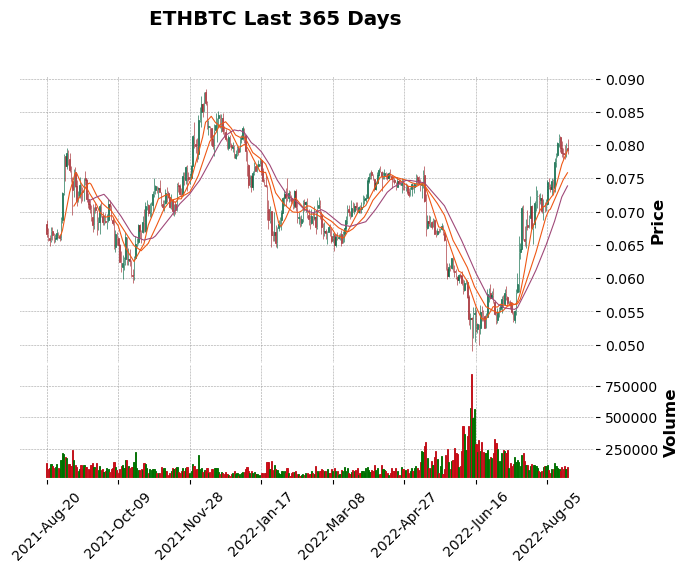

In [41]:
mpf.plot(hist_df.set_index('Close Time').tail(365), 
        type='candle', style='charles', 
        volume=True, 
        title='ETHBTC Last 365 Days', 
        mav=(10,20,30))